Data Loading

In [1]:
import fastf1 
import pandas as pd
import matplotlib.pyplot as plt

fastf1.Cache.enable_cache('../cache')

session = fastf1.get_session(2023, 'Monza', 'R')
session.load()

session.event

core           INFO 	Loading data for Italian Grand Prix - Race [v3.7.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core        WARNING 	Driver 1 completed the race distance 06:25.888000 before the recorded end of the session.
core        WARNING 	Driver 11 completed the race distance 06:19.824000 before the recorded end of the session.
core        WAR

RoundNumber                                                    14
Country                                                     Italy
Location                                                    Monza
OfficialEventName    FORMULA 1 PIRELLI GRAN PREMIO D’ITALIA 2023 
EventDate                                     2023-09-03 00:00:00
EventName                                      Italian Grand Prix
EventFormat                                          conventional
Session1                                               Practice 1
Session1Date                            2023-09-01 13:30:00+02:00
Session1DateUtc                               2023-09-01 11:30:00
Session2                                               Practice 2
Session2Date                            2023-09-01 17:00:00+02:00
Session2DateUtc                               2023-09-01 15:00:00
Session3                                               Practice 3
Session3Date                            2023-09-02 12:30:00+02:00
Session3Da

In [2]:
laps = session.laps
laps.head()


,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
0,0 days 01:23:49.780000,VER,1,0 days 00:01:27.905000,1.0,1.0,NaT,NaT,NaT,0 days 00:00:29.666000,...,True,Red Bull Racing,0 days 01:22:21.726000,2023-09-03 13:23:22.771,1,2.0,False,,False,False
1,0 days 01:25:15.943000,VER,1,0 days 00:01:26.163000,2.0,1.0,NaT,NaT,0 days 00:00:28.274000,0 days 00:00:29.543000,...,True,Red Bull Racing,0 days 01:23:49.780000,2023-09-03 13:24:50.825,1,2.0,False,,False,True
2,0 days 01:26:41.645000,VER,1,0 days 00:01:25.702000,3.0,1.0,NaT,NaT,0 days 00:00:28.097000,0 days 00:00:29.320000,...,True,Red Bull Racing,0 days 01:25:15.943000,2023-09-03 13:26:16.988,1,2.0,False,,False,True
3,0 days 01:28:07.695000,VER,1,0 days 00:01:26.050000,4.0,1.0,NaT,NaT,0 days 00:00:28.145000,0 days 00:00:29.474000,...,True,Red Bull Racing,0 days 01:26:41.645000,2023-09-03 13:27:42.690,1,2.0,False,,False,True
4,0 days 01:29:33.871000,VER,1,0 days 00:01:26.176000,5.0,1.0,NaT,NaT,0 days 00:00:28.155000,0 days 00:00:29.514000,...,True,Red Bull Racing,0 days 01:28:07.695000,2023-09-03 13:29:08.740,1,2.0,False,,False,True


In [3]:
laps.columns


Index(['Time', 'Driver', 'DriverNumber', 'LapTime', 'LapNumber', 'Stint',
       'PitOutTime', 'PitInTime', 'Sector1Time', 'Sector2Time', 'Sector3Time',
       'Sector1SessionTime', 'Sector2SessionTime', 'Sector3SessionTime',
       'SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST', 'IsPersonalBest',
       'Compound', 'TyreLife', 'FreshTyre', 'Team', 'LapStartTime',
       'LapStartDate', 'TrackStatus', 'Position', 'Deleted', 'DeletedReason',
       'FastF1Generated', 'IsAccurate'],
      dtype='object')

In [4]:
laps.tail()

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
953,0 days 02:31:27.432000,PIA,81,0 days 00:01:26.614000,47.0,3.0,NaT,NaT,0 days 00:00:28.276000,0 days 00:00:29.795000,...,False,McLaren,0 days 02:30:00.818000,2023-09-03 14:31:01.863,1,13.0,False,,False,True
954,0 days 02:32:53.499000,PIA,81,0 days 00:01:26.067000,48.0,3.0,NaT,NaT,0 days 00:00:28.089000,0 days 00:00:29.668000,...,False,McLaren,0 days 02:31:27.432000,2023-09-03 14:32:28.477,1,13.0,False,,False,True
955,0 days 02:34:19.340000,PIA,81,0 days 00:01:25.841000,49.0,3.0,NaT,NaT,0 days 00:00:27.763000,0 days 00:00:29.762000,...,False,McLaren,0 days 02:32:53.499000,2023-09-03 14:33:54.544,1,12.0,False,,False,True
956,0 days 02:35:44.933000,PIA,81,0 days 00:01:25.593000,50.0,3.0,NaT,NaT,0 days 00:00:28.181000,0 days 00:00:29.335000,...,False,McLaren,0 days 02:34:19.340000,2023-09-03 14:35:20.385,1,11.0,False,,False,True
957,0 days 02:39:15.549000,PIA,81,NaT,51.0,3.0,NaT,NaT,NaT,NaT,...,False,McLaren,0 days 02:35:44.933000,NaT,1,NaN,False,NaN,True,False


In [5]:
laps.info()


<class 'fastf1.core.Laps'>
RangeIndex: 958 entries, 0 to 957
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype          
---  ------              --------------  -----          
 0   Time                958 non-null    timedelta64[ns]
 1   Driver              958 non-null    object         
 2   DriverNumber        958 non-null    object         
 3   LapTime             948 non-null    timedelta64[ns]
 4   LapNumber           958 non-null    float64        
 5   Stint               958 non-null    float64        
 6   PitOutTime          25 non-null     timedelta64[ns]
 7   PitInTime           26 non-null     timedelta64[ns]
 8   Sector1Time         929 non-null    timedelta64[ns]
 9   Sector2Time         948 non-null    timedelta64[ns]
 10  Sector3Time         948 non-null    timedelta64[ns]
 11  Sector1SessionTime  928 non-null    timedelta64[ns]
 12  Sector2SessionTime  948 non-null    timedelta64[ns]
 13  Sector3SessionTime  948 non-null    timedelta6

In [6]:
lap = laps.pick_drivers('VER').pick_fastest()
telemetry = lap.get_car_data().add_distance()

telemetry.head()


,Date,RPM,Speed,nGear,Throttle,Brake,DRS,Source,Time,SessionTime,Distance
0,2023-09-03 14:09:46.548,11087.0,311.0,8,100.0,False,0,car,0 days 00:00:00.210000,0 days 02:08:45.503000,18.141667
1,2023-09-03 14:09:46.908,11154.0,314.0,8,100.0,False,0,car,0 days 00:00:00.570000,0 days 02:08:45.863000,49.541667
2,2023-09-03 14:09:47.108,11169.0,315.0,8,100.0,False,0,car,0 days 00:00:00.770000,0 days 02:08:46.063000,67.041667
3,2023-09-03 14:09:47.268,11230.0,316.0,8,100.0,False,0,car,0 days 00:00:00.930000,0 days 02:08:46.223000,81.086111
4,2023-09-03 14:09:47.628,11270.0,319.0,8,100.0,False,0,car,0 days 00:00:01.290000,0 days 02:08:46.583000,112.986111


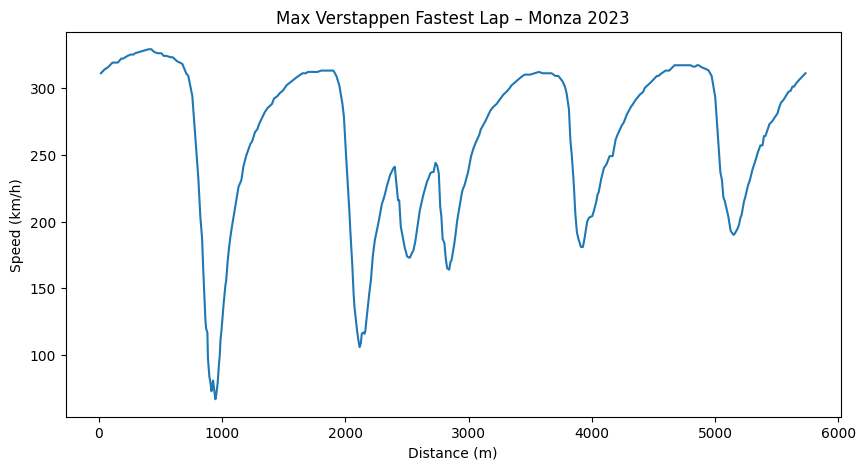

In [7]:
plt.figure(figsize=(10,5))
plt.plot(telemetry['Distance'], telemetry['Speed'])
plt.xlabel('Distance (m)')
plt.ylabel('Speed (km/h)')
plt.title('Max Verstappen Fastest Lap – Monza 2023')
plt.show()


In [8]:
laps.head(10)

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
0,0 days 01:23:49.780000,VER,1,0 days 00:01:27.905000,1.0,1.0,NaT,NaT,NaT,0 days 00:00:29.666000,...,True,Red Bull Racing,0 days 01:22:21.726000,2023-09-03 13:23:22.771,1,2.0,False,,False,False
1,0 days 01:25:15.943000,VER,1,0 days 00:01:26.163000,2.0,1.0,NaT,NaT,0 days 00:00:28.274000,0 days 00:00:29.543000,...,True,Red Bull Racing,0 days 01:23:49.780000,2023-09-03 13:24:50.825,1,2.0,False,,False,True
2,0 days 01:26:41.645000,VER,1,0 days 00:01:25.702000,3.0,1.0,NaT,NaT,0 days 00:00:28.097000,0 days 00:00:29.320000,...,True,Red Bull Racing,0 days 01:25:15.943000,2023-09-03 13:26:16.988,1,2.0,False,,False,True
3,0 days 01:28:07.695000,VER,1,0 days 00:01:26.050000,4.0,1.0,NaT,NaT,0 days 00:00:28.145000,0 days 00:00:29.474000,...,True,Red Bull Racing,0 days 01:26:41.645000,2023-09-03 13:27:42.690,1,2.0,False,,False,True
4,0 days 01:29:33.871000,VER,1,0 days 00:01:26.176000,5.0,1.0,NaT,NaT,0 days 00:00:28.155000,0 days 00:00:29.514000,...,True,Red Bull Racing,0 days 01:28:07.695000,2023-09-03 13:29:08.740,1,2.0,False,,False,True
5,0 days 01:31:00.708000,VER,1,0 days 00:01:26.837000,6.0,1.0,NaT,NaT,0 days 00:00:28.700000,0 days 00:00:29.662000,...,True,Red Bull Racing,0 days 01:29:33.871000,2023-09-03 13:30:34.916,1,2.0,False,,False,True
6,0 days 01:32:27.076000,VER,1,0 days 00:01:26.368000,7.0,1.0,NaT,NaT,0 days 00:00:28.166000,0 days 00:00:29.751000,...,True,Red Bull Racing,0 days 01:31:00.708000,2023-09-03 13:32:01.753,1,2.0,False,,False,True
7,0 days 01:33:53.066000,VER,1,0 days 00:01:25.990000,8.0,1.0,NaT,NaT,0 days 00:00:28.075000,0 days 00:00:29.432000,...,True,Red Bull Racing,0 days 01:32:27.076000,2023-09-03 13:33:28.121,1,2.0,False,,False,True
8,0 days 01:35:19.671000,VER,1,0 days 00:01:26.605000,9.0,1.0,NaT,NaT,0 days 00:00:28.149000,0 days 00:00:29.927000,...,True,Red Bull Racing,0 days 01:33:53.066000,2023-09-03 13:34:54.111,1,2.0,False,,False,True
9,0 days 01:36:46.274000,VER,1,0 days 00:01:26.603000,10.0,1.0,NaT,NaT,0 days 00:00:28.315000,0 days 00:00:29.780000,...,True,Red Bull Racing,0 days 01:35:19.671000,2023-09-03 13:36:20.716,1,2.0,False,,False,True


In [9]:
laps.info()


<class 'fastf1.core.Laps'>
RangeIndex: 958 entries, 0 to 957
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype          
---  ------              --------------  -----          
 0   Time                958 non-null    timedelta64[ns]
 1   Driver              958 non-null    object         
 2   DriverNumber        958 non-null    object         
 3   LapTime             948 non-null    timedelta64[ns]
 4   LapNumber           958 non-null    float64        
 5   Stint               958 non-null    float64        
 6   PitOutTime          25 non-null     timedelta64[ns]
 7   PitInTime           26 non-null     timedelta64[ns]
 8   Sector1Time         929 non-null    timedelta64[ns]
 9   Sector2Time         948 non-null    timedelta64[ns]
 10  Sector3Time         948 non-null    timedelta64[ns]
 11  Sector1SessionTime  928 non-null    timedelta64[ns]
 12  Sector2SessionTime  948 non-null    timedelta64[ns]
 13  Sector3SessionTime  948 non-null    timedelta6

In [10]:
laps[['Driver', 'LapNumber', 'LapTime', 'PitInTime', 'PitOutTime']].head(15)


,Driver,LapNumber,LapTime,PitInTime,PitOutTime
0,VER,1.0,0 days 00:01:27.905000,NaT,NaT
1,VER,2.0,0 days 00:01:26.163000,NaT,NaT
2,VER,3.0,0 days 00:01:25.702000,NaT,NaT
3,VER,4.0,0 days 00:01:26.050000,NaT,NaT
4,VER,5.0,0 days 00:01:26.176000,NaT,NaT
5,VER,6.0,0 days 00:01:26.837000,NaT,NaT
6,VER,7.0,0 days 00:01:26.368000,NaT,NaT
7,VER,8.0,0 days 00:01:25.990000,NaT,NaT
8,VER,9.0,0 days 00:01:26.605000,NaT,NaT
9,VER,10.0,0 days 00:01:26.603000,NaT,NaT


Lap Data Cleaning

In [11]:
valid_laps = laps[
    laps['PitInTime'].isna() &
    laps['PitOutTime'].isna() &
    laps['LapTime'].notna()
]


In [12]:
print("Total laps:", len(laps))
print("Valid laps:", len(valid_laps))


Total laps: 958
Valid laps: 897


In [13]:
ver_laps = valid_laps.pick_drivers('VER')
ver_laps[['LapNumber', 'LapTime', 'Compound']].head()


,LapNumber,LapTime,Compound
0,1.0,0 days 00:01:27.905000,MEDIUM
1,2.0,0 days 00:01:26.163000,MEDIUM
2,3.0,0 days 00:01:25.702000,MEDIUM
3,4.0,0 days 00:01:26.050000,MEDIUM
4,5.0,0 days 00:01:26.176000,MEDIUM


In [14]:
ver_laps = valid_laps.pick_drivers('HAM')
ver_laps[['LapNumber', 'LapTime', 'Compound']].head()


,LapNumber,LapTime,Compound
703,1.0,0 days 00:01:32.011000,HARD
704,2.0,0 days 00:01:27.837000,HARD
705,3.0,0 days 00:01:27.289000,HARD
706,4.0,0 days 00:01:27.233000,HARD
707,5.0,0 days 00:01:27.015000,HARD


In [15]:
fastest_laps = (
    valid_laps
    .groupby('Driver')
    .apply(lambda x: x.loc[x['LapTime'].idxmin()])
    .reset_index(drop=True)
)

fastest_laps[['Driver', 'LapTime', 'Compound']]


/var/folders/2m/v6hy6xns3rngxbh_2b7bnk0h0000gn/T/ipykernel_2114/2273509353.py:4: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.loc[x['LapTime'].idxmin()])


,Driver,LapTime,Compound
0,ALB,0 days 00:01:26.389000,HARD
1,ALO,0 days 00:01:26.105000,HARD
2,BOT,0 days 00:01:25.988000,MEDIUM
3,GAS,0 days 00:01:25.758000,MEDIUM
4,HAM,0 days 00:01:25.582000,MEDIUM
5,HUL,0 days 00:01:25.894000,MEDIUM
6,LAW,0 days 00:01:25.842000,MEDIUM
7,LEC,0 days 00:01:25.580000,HARD
8,MAG,0 days 00:01:26.278000,MEDIUM
9,NOR,0 days 00:01:26.144000,HARD


Telemetry Analysis

In [16]:
avg_lap_times = (
    valid_laps
    .groupby('Driver')['LapTime']
    .mean()
    .sort_values()
)

avg_lap_times.head(10)


Driver
VER   0 days 00:01:26.217020408
PER   0 days 00:01:26.347857142
SAI   0 days 00:01:26.401265306
LEC   0 days 00:01:26.439244897
RUS   0 days 00:01:26.570938775
PIA   0 days 00:01:26.874456521
HAM   0 days 00:01:26.930938775
ALB   0 days 00:01:27.068224489
ALO   0 days 00:01:27.097714285
LAW   0 days 00:01:27.108239130
Name: LapTime, dtype: timedelta64[ns]

In [17]:
lap_std = (
    valid_laps
    .groupby('Driver')['LapTime']
    .std()
    .sort_values()
)

lap_std.head(10)


Driver
RUS   0 days 00:00:00.574602159
SAI   0 days 00:00:00.601976562
LEC   0 days 00:00:00.669121579
ALB   0 days 00:00:00.674303784
VER   0 days 00:00:00.705561994
PER   0 days 00:00:00.713480290
NOR   0 days 00:00:00.793401327
PIA   0 days 00:00:00.815931307
HAM   0 days 00:00:00.971174641
ALO   0 days 00:00:01.010166240
Name: LapTime, dtype: timedelta64[ns]

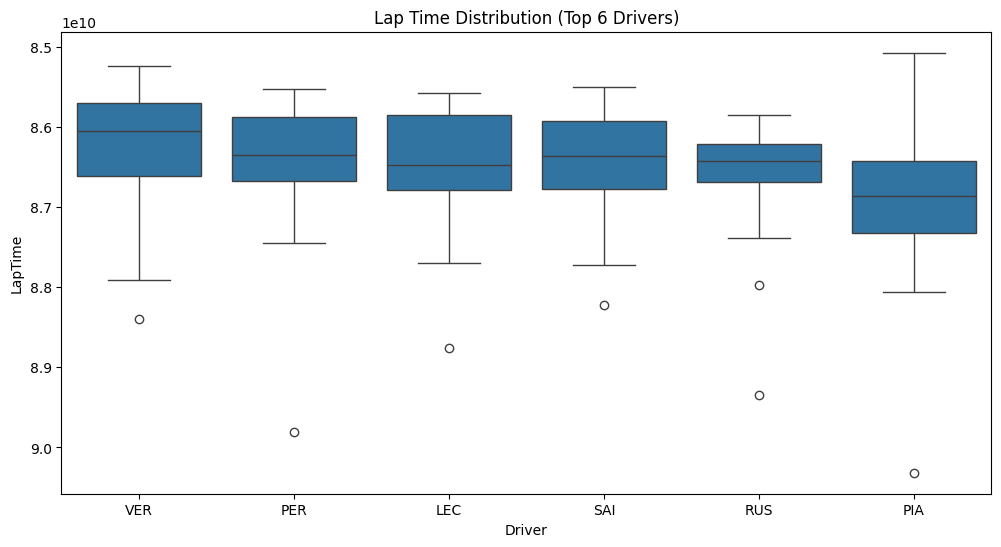

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

top_drivers = avg_lap_times.head(6).index

plt.figure(figsize=(12,6))
sns.boxplot(
    data=valid_laps[valid_laps['Driver'].isin(top_drivers)],
    x='Driver',
    y='LapTime'
)
plt.title('Lap Time Distribution (Top 6 Drivers)')
plt.show()


Driver Comparison

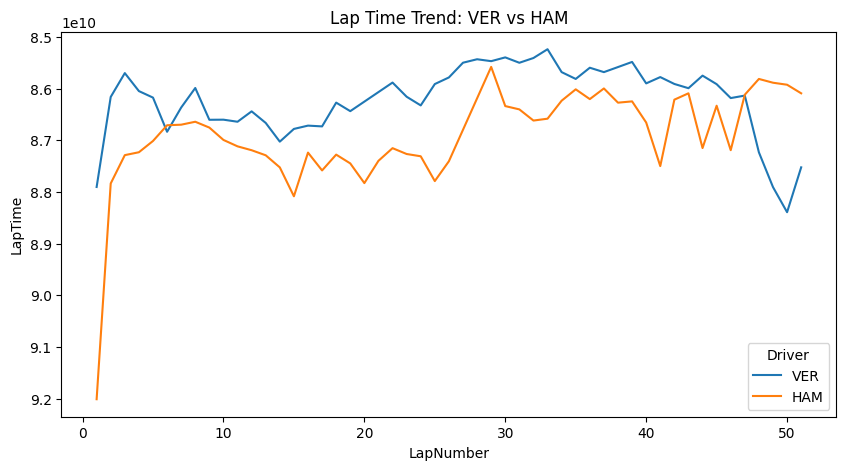

In [19]:
comparison = valid_laps[
    valid_laps['Driver'].isin(['VER', 'HAM'])
]

plt.figure(figsize=(10,5))
sns.lineplot(
    data=comparison,
    x='LapNumber',
    y='LapTime',
    hue='Driver'
)
plt.title('Lap Time Trend: VER vs HAM')
plt.show()


In [20]:
# Pick Verstappen's fastest valid lap
ver_fastest_lap = (
    valid_laps
    .pick_drivers('VER')
    .loc[lambda x: x['LapTime'].idxmin()]
)

ver_fastest_lap


Time                      0 days 02:10:10.533000
Driver                                       VER
DriverNumber                                   1
LapTime                   0 days 00:01:25.240000
LapNumber                                   33.0
Stint                                        2.0
PitOutTime                                   NaT
PitInTime                                    NaT
Sector1Time               0 days 00:00:28.057000
Sector2Time               0 days 00:00:29.201000
Sector3Time               0 days 00:00:27.982000
Sector1SessionTime        0 days 02:09:13.353000
Sector2SessionTime        0 days 02:09:42.554000
Sector3SessionTime        0 days 02:10:10.536000
SpeedI1                                    312.0
SpeedI2                                    311.0
SpeedFL                                    310.0
SpeedST                                    311.0
IsPersonalBest                              True
Compound                                    HARD
TyreLife            

In [21]:
ver_telemetry = (
    ver_fastest_lap
    .get_car_data()
    .add_distance()
)

ver_telemetry.head()


,Date,RPM,Speed,nGear,Throttle,Brake,DRS,Source,Time,SessionTime,Distance
0,2023-09-03 14:09:46.548,11087.0,311.0,8,100.0,False,0,car,0 days 00:00:00.210000,0 days 02:08:45.503000,18.141667
1,2023-09-03 14:09:46.908,11154.0,314.0,8,100.0,False,0,car,0 days 00:00:00.570000,0 days 02:08:45.863000,49.541667
2,2023-09-03 14:09:47.108,11169.0,315.0,8,100.0,False,0,car,0 days 00:00:00.770000,0 days 02:08:46.063000,67.041667
3,2023-09-03 14:09:47.268,11230.0,316.0,8,100.0,False,0,car,0 days 00:00:00.930000,0 days 02:08:46.223000,81.086111
4,2023-09-03 14:09:47.628,11270.0,319.0,8,100.0,False,0,car,0 days 00:00:01.290000,0 days 02:08:46.583000,112.986111


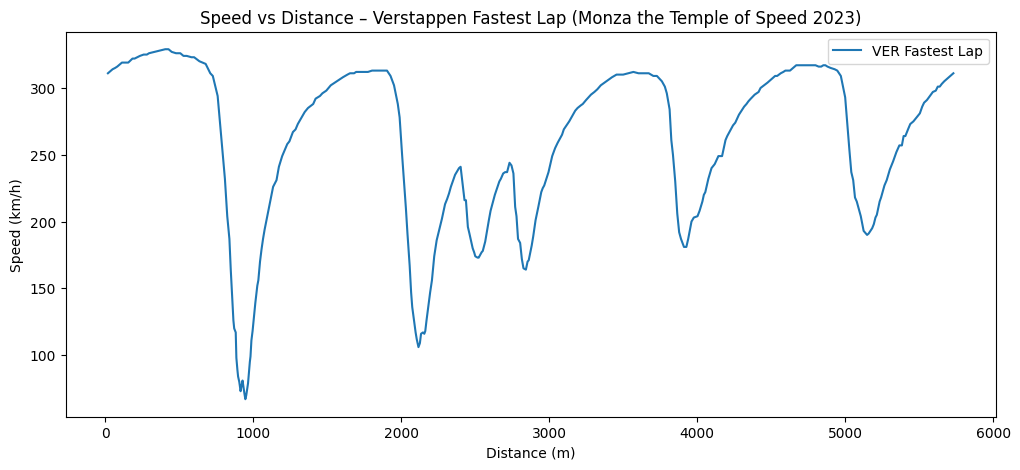

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(
    ver_telemetry['Distance'],
    ver_telemetry['Speed'],
    label='VER Fastest Lap'
)

plt.xlabel('Distance (m)')
plt.ylabel('Speed (km/h)')
plt.title('Speed vs Distance – Verstappen Fastest Lap (Monza the Temple of Speed 2023)')
plt.legend()
plt.show()


### Speed vs Distance Analysis
This plot shows how speed varies along the lap distance. 
Higher peaks represent straights, while sharp drops indicate braking zones.
Verstappen maintains higher minimum speeds through corners, contributing to a faster lap.


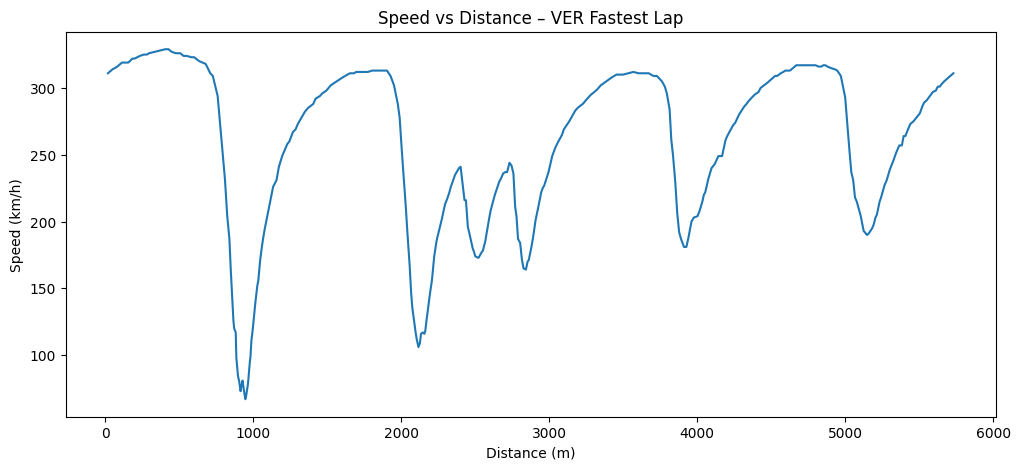

In [23]:
plt.figure(figsize=(12,5))
plt.plot(ver_telemetry['Distance'], ver_telemetry['Speed'])
plt.xlabel('Distance (m)')
plt.ylabel('Speed (km/h)')
plt.title('Speed vs Distance – VER Fastest Lap')

plt.savefig('../outputs/plots/ver_speed_distance.png', dpi=300)
plt.show()


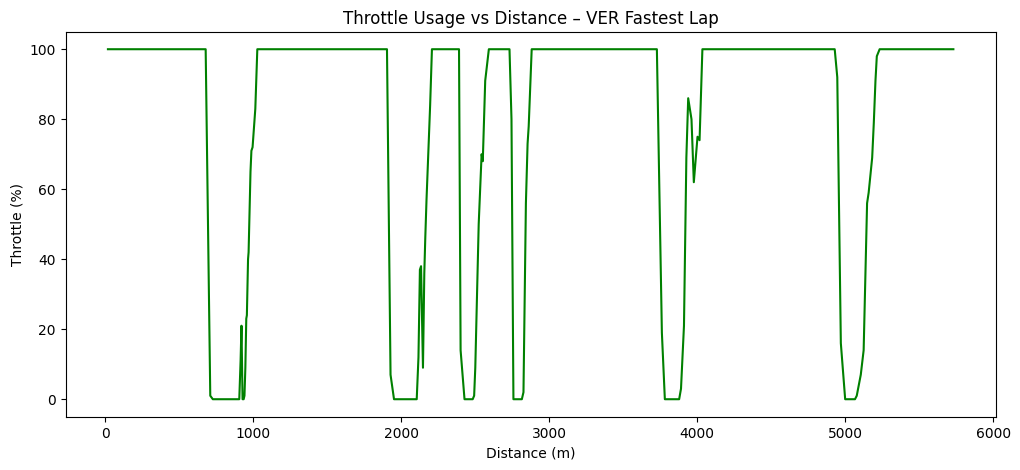

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(
    ver_telemetry['Distance'],
    ver_telemetry['Throttle'],
    color='green'
)

plt.xlabel('Distance (m)')
plt.ylabel('Throttle (%)')
plt.title('Throttle Usage vs Distance – VER Fastest Lap')
plt.show()


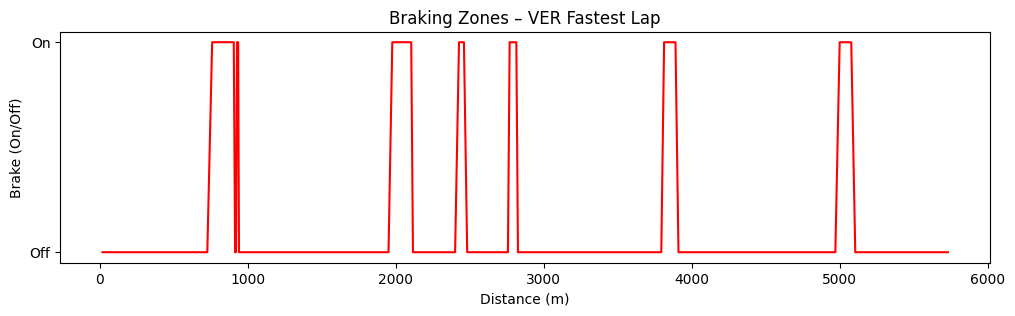

In [25]:
plt.figure(figsize=(12,3))
plt.plot(
    ver_telemetry['Distance'],
    ver_telemetry['Brake'].astype(int),
    color='red'
)

plt.xlabel('Distance (m)')
plt.ylabel('Brake (On/Off)')
plt.title('Braking Zones – VER Fastest Lap')
plt.yticks([0,1], ['Off','On'])
plt.show()


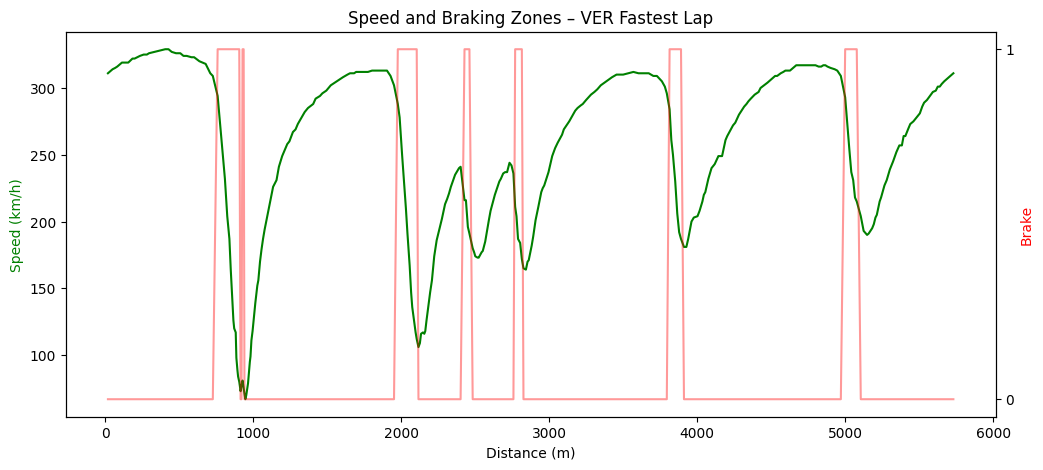

In [26]:
fig, ax1 = plt.subplots(figsize=(12,5))

ax1.plot(
    ver_telemetry['Distance'],
    ver_telemetry['Speed'],
    color='green',
    label='Speed'
)
ax1.set_xlabel('Distance (m)')
ax1.set_ylabel('Speed (km/h)', color='green')

ax2 = ax1.twinx()
ax2.plot(
    ver_telemetry['Distance'],
    ver_telemetry['Brake'].astype(int),
    color='red',
    alpha=0.4,
    label='Brake'
)
ax2.set_ylabel('Brake', color='red')
ax2.set_yticks([0,1])

plt.title('Speed and Braking Zones – VER Fastest Lap')

plt.savefig('../outputs/plots/ver_speed_braking.png', dpi=300)
plt.show()


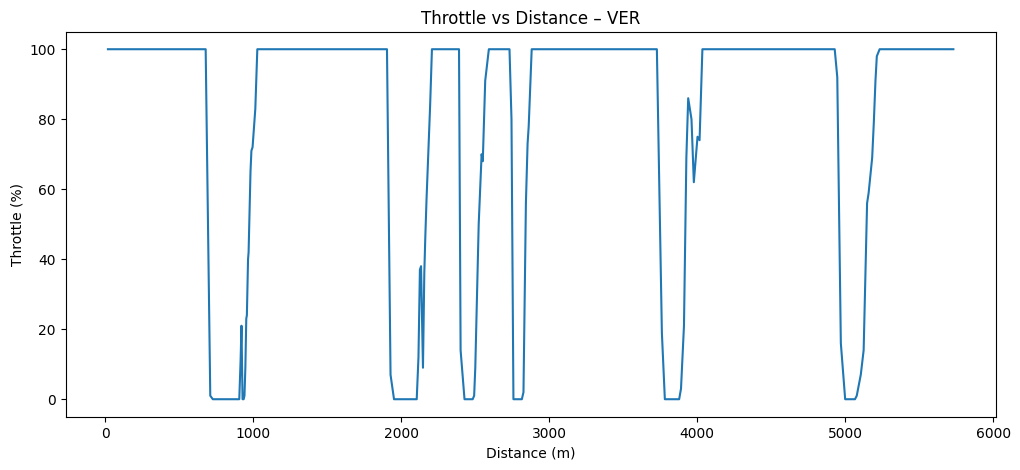

In [27]:
plt.figure(figsize=(12,5))
plt.plot(ver_telemetry['Distance'], ver_telemetry['Throttle'])
plt.xlabel('Distance (m)')
plt.ylabel('Throttle (%)')
plt.title('Throttle vs Distance – VER')

plt.savefig('../outputs/plots/ver_throttle_distance.png', dpi=300)
plt.show()


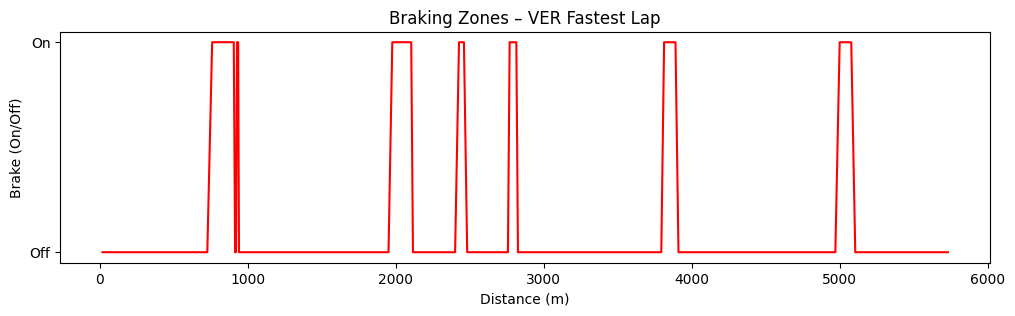

In [28]:
plt.figure(figsize=(12,3))
plt.plot(
    ver_telemetry['Distance'],
    ver_telemetry['Brake'].astype(int),
    color='red'
)

plt.xlabel('Distance (m)')
plt.ylabel('Brake (On/Off)')
plt.title('Braking Zones – VER Fastest Lap')
plt.yticks([0,1], ['Off','On'])

plt.savefig('../outputs/plots/ver_brake_distance.png', dpi=300)
plt.show()


In [29]:
# Verstappen fastest valid lap
ver_lap = (
    valid_laps
    .pick_drivers('VER')
    .loc[lambda x: x['LapTime'].idxmin()]
)

# Hamilton fastest valid lap
ham_lap = (
    valid_laps
    .pick_drivers('HAM')
    .loc[lambda x: x['LapTime'].idxmin()]
)


In [30]:
ver_lap


Time                      0 days 02:10:10.533000
Driver                                       VER
DriverNumber                                   1
LapTime                   0 days 00:01:25.240000
LapNumber                                   33.0
Stint                                        2.0
PitOutTime                                   NaT
PitInTime                                    NaT
Sector1Time               0 days 00:00:28.057000
Sector2Time               0 days 00:00:29.201000
Sector3Time               0 days 00:00:27.982000
Sector1SessionTime        0 days 02:09:13.353000
Sector2SessionTime        0 days 02:09:42.554000
Sector3SessionTime        0 days 02:10:10.536000
SpeedI1                                    312.0
SpeedI2                                    311.0
SpeedFL                                    310.0
SpeedST                                    311.0
IsPersonalBest                              True
Compound                                    HARD
TyreLife            

In [31]:
ham_lap

Time                      0 days 02:05:00.781000
Driver                                       HAM
DriverNumber                                  44
LapTime                   0 days 00:01:25.582000
LapNumber                                   29.0
Stint                                        2.0
PitOutTime                                   NaT
PitInTime                                    NaT
Sector1Time               0 days 00:00:27.731000
Sector2Time               0 days 00:00:29.450000
Sector3Time               0 days 00:00:28.401000
Sector1SessionTime        0 days 02:04:02.950000
Sector2SessionTime        0 days 02:04:32.400000
Sector3SessionTime        0 days 02:05:00.801000
SpeedI1                                    320.0
SpeedI2                                    308.0
SpeedFL                                    306.0
SpeedST                                    345.0
IsPersonalBest                              True
Compound                                  MEDIUM
TyreLife            

In [32]:
ver_tel = ver_lap.get_car_data().add_distance()
ham_tel = ham_lap.get_car_data().add_distance()


In [33]:
ham_tel

,Date,RPM,Speed,nGear,Throttle,Brake,DRS,Source,Time,SessionTime,Distance
0,2023-09-03 14:04:36.387,11631.0,317.0,8,100.0,False,8,car,0 days 00:00:00.143000,0 days 02:03:35.342000,12.591944
1,2023-09-03 14:04:36.747,11716.0,319.0,8,100.0,False,8,car,0 days 00:00:00.503000,0 days 02:03:35.702000,44.491944
2,2023-09-03 14:04:37.027,11792.0,321.0,8,100.0,False,8,car,0 days 00:00:00.783000,0 days 02:03:35.982000,69.458611
3,2023-09-03 14:04:37.267,11894.0,321.0,8,100.0,False,8,car,0 days 00:00:01.023000,0 days 02:03:36.222000,90.858611
4,2023-09-03 14:04:37.667,11965.0,325.0,8,100.0,False,14,car,0 days 00:00:01.423000,0 days 02:03:36.622000,126.969722
...,...,...,...,...,...,...,...,...,...,...,...
312,2023-09-03 14:06:00.388,10980.0,298.0,8,100.0,False,0,car,0 days 00:01:24.144000,0 days 02:04:59.343000,5632.578056
313,2023-09-03 14:06:00.828,11117.0,302.0,8,100.0,False,0,car,0 days 00:01:24.584000,0 days 02:04:59.783000,5669.489167
314,2023-09-03 14:06:01.028,11146.0,303.0,8,100.0,False,0,car,0 days 00:01:24.784000,0 days 02:04:59.983000,5686.322500
315,2023-09-03 14:06:01.468,11289.0,306.0,8,100.0,False,0,car,0 days 00:01:25.224000,0 days 02:05:00.423000,5723.722500


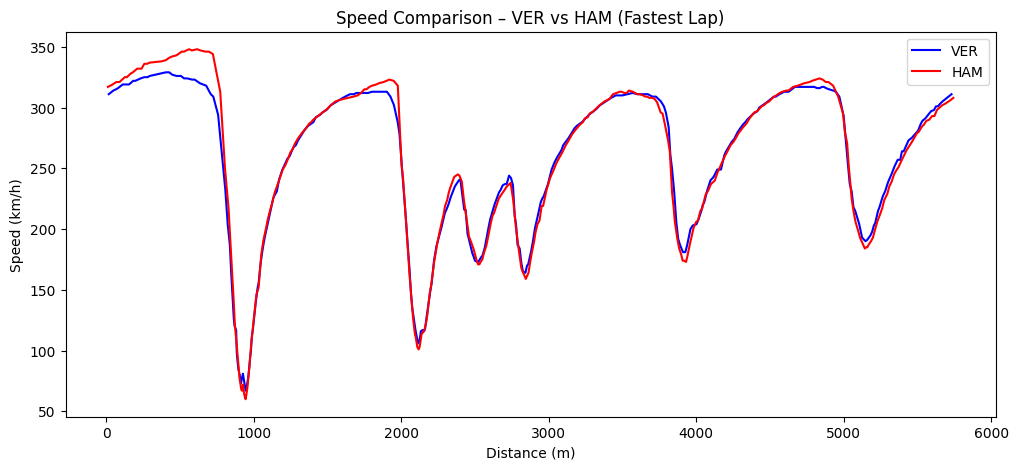

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(ver_tel['Distance'], ver_tel['Speed'], label='VER', color='blue')
plt.plot(ham_tel['Distance'], ham_tel['Speed'], label='HAM', color='red')

plt.xlabel('Distance (m)')
plt.ylabel('Speed (km/h)')
plt.title('Speed Comparison – VER vs HAM (Fastest Lap)')
plt.legend()
plt.show()

#How to interpret:
#Where blue > red → VER faster
#Earlier speed drop → earlier braking
#Higher exit speed → better traction
#This single plot already answers “who is faster where”


### Speed Comparison Analysis
This plot compares the speed profiles of the two drivers along the lap distance.
Higher speed on straights reflects better power delivery and aerodynamic efficiency, while higher minimum speed through corners indicates confidence and optimal racing lines.
Consistent speed advantages across multiple track sections contribute significantly to overall lap time performance.

The speed trace shows that the faster lap is achieved not by a single section, but through small speed advantages accumulated across multiple corners and straights.


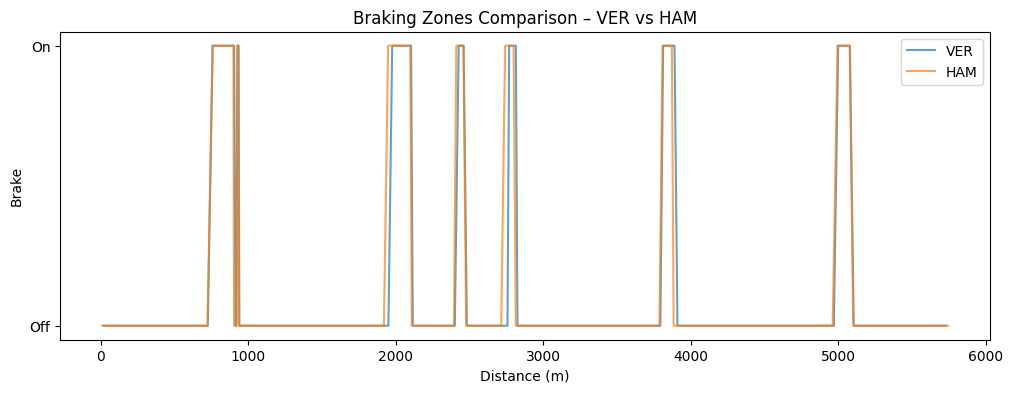

In [35]:
plt.figure(figsize=(12,4))
plt.plot(ver_tel['Distance'], ver_tel['Brake'].astype(int), label='VER', alpha=0.7)
plt.plot(ham_tel['Distance'], ham_tel['Brake'].astype(int), label='HAM', alpha=0.7)

plt.xlabel('Distance (m)')
plt.ylabel('Brake')
plt.yticks([0,1], ['Off','On'])
plt.title('Braking Zones Comparison – VER vs HAM')
plt.legend()
plt.show()

#What this reveals:
#Who brakes earlier
#Who brakes longer
#Who brakes more aggressively
#📌 Late braking = potential lap time gain (if controlled).


### Braking Zone Comparison
This plot highlights braking behavior along the lap for both drivers.
Differences in braking points reveal driving style and confidence under braking.
Later braking and shorter braking durations generally indicate a more aggressive approach, allowing higher entry speeds into corners and potential lap time gains.

“Braking traces reveal how late and how aggressively a driver commits to corner entry.”

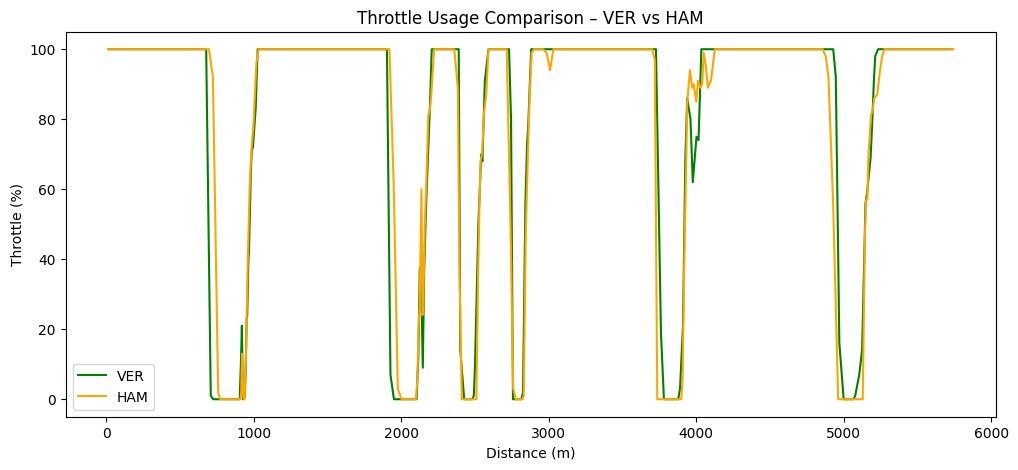

In [36]:
plt.figure(figsize=(12,5))
plt.plot(ver_tel['Distance'], ver_tel['Throttle'], label='VER', color='green')
plt.plot(ham_tel['Distance'], ham_tel['Throttle'], label='HAM', color='orange')

plt.xlabel('Distance (m)')
plt.ylabel('Throttle (%)')
plt.title('Throttle Usage Comparison – VER vs HAM')
plt.legend()
plt.show()

#Interpretation:
#Earlier throttle application = better exit
#Smoother throttle = stability
#Aggressive throttle = traction advantage


### Throttle Usage Comparison
This plot compares throttle application between the two drivers across the lap distance.
Earlier and smoother throttle application indicates better traction and confidence on corner exits.
The driver with higher throttle usage sooner after braking zones gains time by accelerating earlier out of corners, especially in medium and high-speed sections.

“Throttle traces show corner exit efficiency, which is a key contributor to lap time differences.”

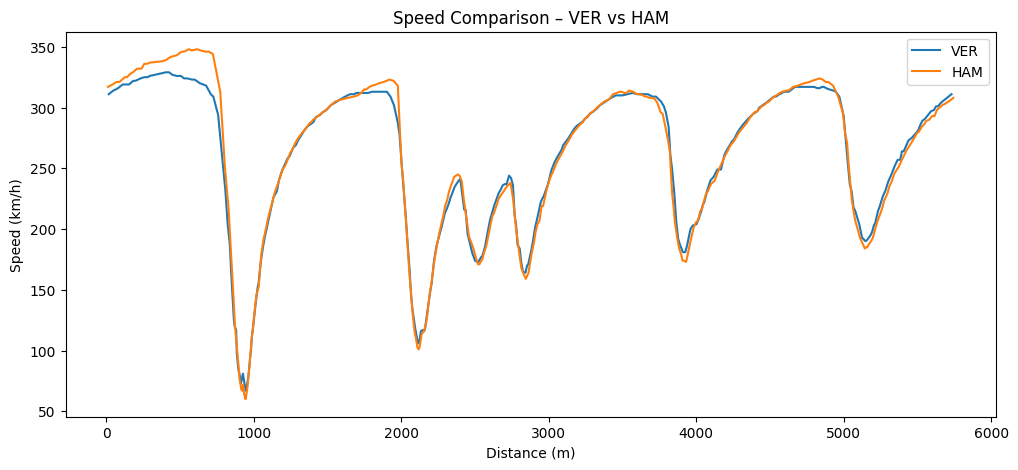

In [37]:
plt.figure(figsize=(12,5))
plt.plot(ver_tel['Distance'], ver_tel['Speed'], label='VER')
plt.plot(ham_tel['Distance'], ham_tel['Speed'], label='HAM')
plt.xlabel('Distance (m)')
plt.ylabel('Speed (km/h)')
plt.title('Speed Comparison – VER vs HAM')
plt.legend()

plt.savefig('../outputs/plots/ver_vs_ham_speed.png', dpi=300)
plt.show()


Delta Time Analysis

Delta time analysis, which answers the golden question in F1 analytics:
 ❝Exactly where on the track does one driver gain or lose time?❞

 Concept:
  Delta Time = Time difference between two laps at the same distance
  Positive delta → Driver A is slower
  Negative delta → Driver A is faster
  
 Delta plots show:
  Corner-by-corner advantage
  Straight-line gains
  Overall lap advantage
  This is exactly what F1 teams use internally (at a higher resolution).

In [38]:
ver_tel = ver_tel[['Distance', 'Speed']].copy()
ham_tel = ham_tel[['Distance', 'Speed']].copy()


In [39]:
import numpy as np

# Create common distance axis
common_distance = np.linspace(
    max(ver_tel['Distance'].min(), ham_tel['Distance'].min()),
    min(ver_tel['Distance'].max(), ham_tel['Distance'].max()),
    1000
)

# Interpolate speed
ver_speed_interp = np.interp(common_distance, ver_tel['Distance'], ver_tel['Speed'])
ham_speed_interp = np.interp(common_distance, ham_tel['Distance'], ham_tel['Speed'])


In [40]:
# Convert km/h to m/s
ver_speed_ms = ver_speed_interp / 3.6
ham_speed_ms = ham_speed_interp / 3.6

# Compute time per segment
segment_length = common_distance[1] - common_distance[0]

ver_time = np.cumsum(segment_length / ver_speed_ms)
ham_time = np.cumsum(segment_length / ham_speed_ms)

# Delta time (HAM relative to VER)
delta_time = ham_time - ver_time

# Positive delta → HAM slower
# Negative delta → HAM faster

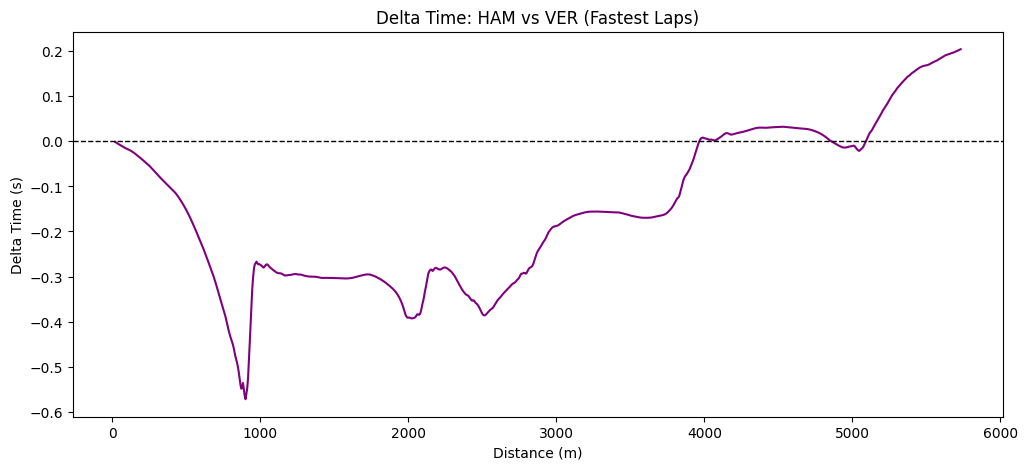

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(common_distance, delta_time, color='purple')

plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.xlabel('Distance (m)')
plt.ylabel('Delta Time (s)')
plt.title('Delta Time: HAM vs VER (Fastest Laps)')
plt.show()


### Delta Time Analysis
The delta time plot shows the cumulative time difference between the two drivers along the lap distance.
Upward slopes indicate time gained by one driver, while downward slopes indicate time loss.
Flat sections represent equal performance.
This visualization clearly identifies specific track segments where the lap time advantage is created, providing a quantitative explanation beyond raw lap times.

🧠 How to Interpret the Delta Plot (VERY IMPORTANT)
📉 Downward slope → HAM gaining time
📈 Upward slope → VER gaining time
🟰 Flat section → equal performance
🏁 Final value → total lap time difference

Example interpretation you can write:
“Hamilton loses most time in high-speed chicanes, while Verstappen gains time on corner exits.”

The single lap distance for the Autodromo Nazionale Monza, home of the Italian Grand Prix, is 5.793 kilometers (3.6 miles), featuring long straights and high-speed corners that earn it the nickname "Temple of Speed". This layout results in a high percentage of full throttle and low downforce, with 11 turns. 
Key Details:
Length: 5.793 km (3.6 miles).
Turns: 11.
Characteristics: Known for its long straights and low downforce setup, demanding high top speeds.
Race Distance: Typically 53 laps for the Formula 1 Italian Grand Prix, covering 306.72 km (190.587 miles). 

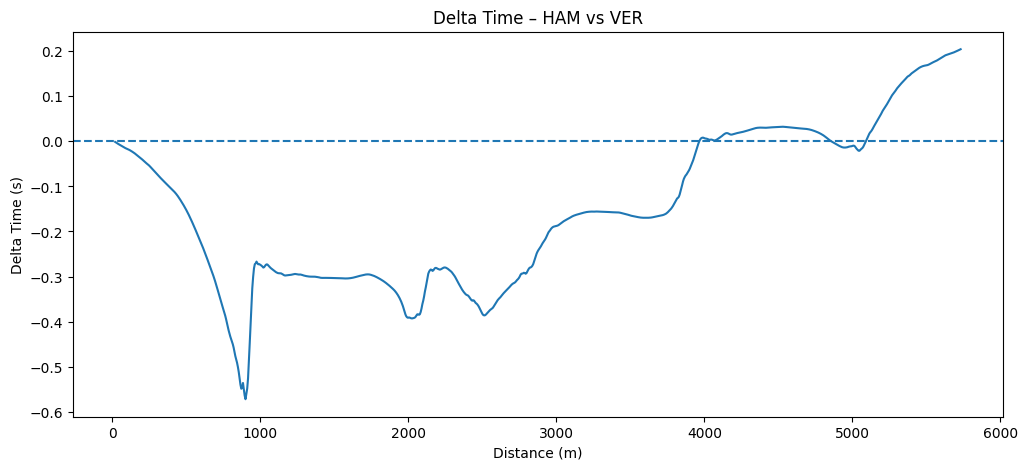

In [42]:
plt.figure(figsize=(12,5))
plt.plot(common_distance, delta_time)
plt.axhline(0, linestyle='--')

plt.xlabel('Distance (m)')
plt.ylabel('Delta Time (s)')
plt.title('Delta Time – HAM vs VER')

plt.savefig('../outputs/plots/ham_vs_ver_delta.png', dpi=300)
plt.show()


## Key Insights – Monza 2023 (Fastest Laps)

- Verstappen achieves higher top speed on the main straight, indicating better straight-line efficiency.
- Hamilton brakes earlier in heavy braking zones, resulting in time loss before corner entry.
- Verstappen applies throttle earlier on corner exits, gaining time through improved traction.
- Delta time analysis shows Verstappen gains most time in high-speed chicanes and exits.

 Overall, delta analysis demonstrates that lap time differences are not uniform but are accumulated in specific corners and exit zones.



In [43]:
import sys
import os

sys.path.append(os.path.abspath('..'))


In [44]:
from src.data_loader import load_session
from src.telemetry_utils import get_fastest_valid_lap, get_telemetry
from src.delta_utils import compute_delta_time

session = load_session(2023, 'Monza', 'R')
laps = session.laps

valid_laps = laps[
    laps['PitInTime'].isna() &
    laps['PitOutTime'].isna() &
    laps['LapTime'].notna()
]

ver_lap = get_fastest_valid_lap(valid_laps, 'VER')
ham_lap = get_fastest_valid_lap(valid_laps, 'HAM')

ver_tel = get_telemetry(ver_lap)
ham_tel = get_telemetry(ham_lap)

dist, delta = compute_delta_time(ver_tel, ham_tel)


core           INFO 	Loading data for Italian Grand Prix - Race [v3.7.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core        WARNING 	Driver 1 completed the race distance 06:25.888000 before the recorded end of the session.
core        WARNING 	Driver 11 completed the race distance 06:19.824000 before the recorded end of the session.
core        WAR